In [1]:
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
seaborn.set()

In [2]:
panel_data_l1 = pd.read_csv('./data/panel_data/panel_data_l1.csv')
panel_data_l2_l3 = pd.read_csv('./data/panel_data/panel_data_l2_l3.csv')
df_eco_features = pd.read_csv('./data/panel_data/economic_features.csv')
df_educ_features_l1 = pd.read_csv('./data/panel_data/educ_features_l1.csv')
df_labour_features = pd.read_csv('./data/panel_data/labour_market.csv')

In [3]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}
code_countries = [code for code in oecd_countries.keys()]
years = [year for year in range(2013,2019)]

In [4]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [5]:
exp_lmp = panel_data_l1.Exp_LMP
panel_data_l1['Exp_LMP_2'] = exp_lmp**2
panel_data_l1['Exp_LMP_3'] = exp_lmp**3

stratio = panel_data_l1.STR
panel_data_l1['STR_2'] = stratio**2
panel_data_l1['STR_3'] = stratio**3

In [6]:
calc_vif(panel_data_l1[['Exp_LMP', 'STR', 'Min_Wage']])

,variables,VIF
0,Exp_LMP,3.792797
1,STR,3.916821
2,Min_Wage,6.491314


Text(0.5, 1, 'Correlation Heatmap')

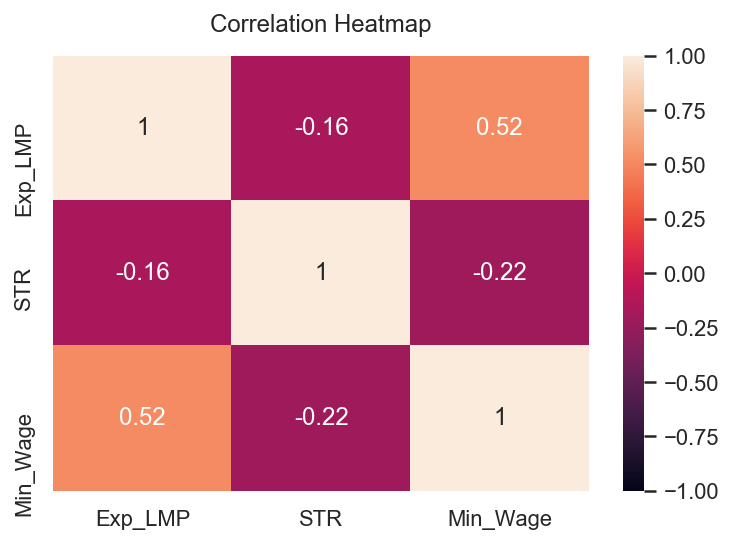

In [7]:
heatmap = seaborn.heatmap(panel_data_l1[['Exp_LMP', 'STR', 'Min_Wage']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', pad=12)

In [8]:
panel_data_l1

,Country,Time,NEET,Exp_LMP,STR,Min_Wage,Exp_LMP_2,Exp_LMP_3,STR_2,STR_3
0,AUS,2013,13.015899,0.87,15.615,23283.766881,0.7569,0.658503,243.828225,3807.377733
1,AUS,2014,12.647472,0.93,15.612,23356.492667,0.8649,0.804357,243.734544,3805.183701
2,AUS,2015,11.831610,0.91,15.433,23641.395398,0.8281,0.753571,238.177489,3675.793188
3,AUS,2016,11.352150,0.86,15.168,23915.419580,0.7396,0.636056,230.068224,3489.674822
4,AUS,2017,10.946128,0.85,15.124,24128.731046,0.7225,0.614125,228.735376,3459.393827
...,...,...,...,...,...,...,...,...,...,...
123,USA,2014,15.047262,0.28,15.435,16285.276127,0.0784,0.021952,238.239225,3677.222438
124,USA,2015,14.380193,0.28,15.354,16265.980260,0.0784,0.021952,235.745316,3619.633582
125,USA,2016,14.118049,0.26,15.216,16063.328012,0.0676,0.017576,231.526656,3522.909598
126,USA,2017,13.280724,0.24,15.182,15728.297963,0.0576,0.013824,230.493124,3499.346609


# Plot NEET, STR and Exp_LMP through time

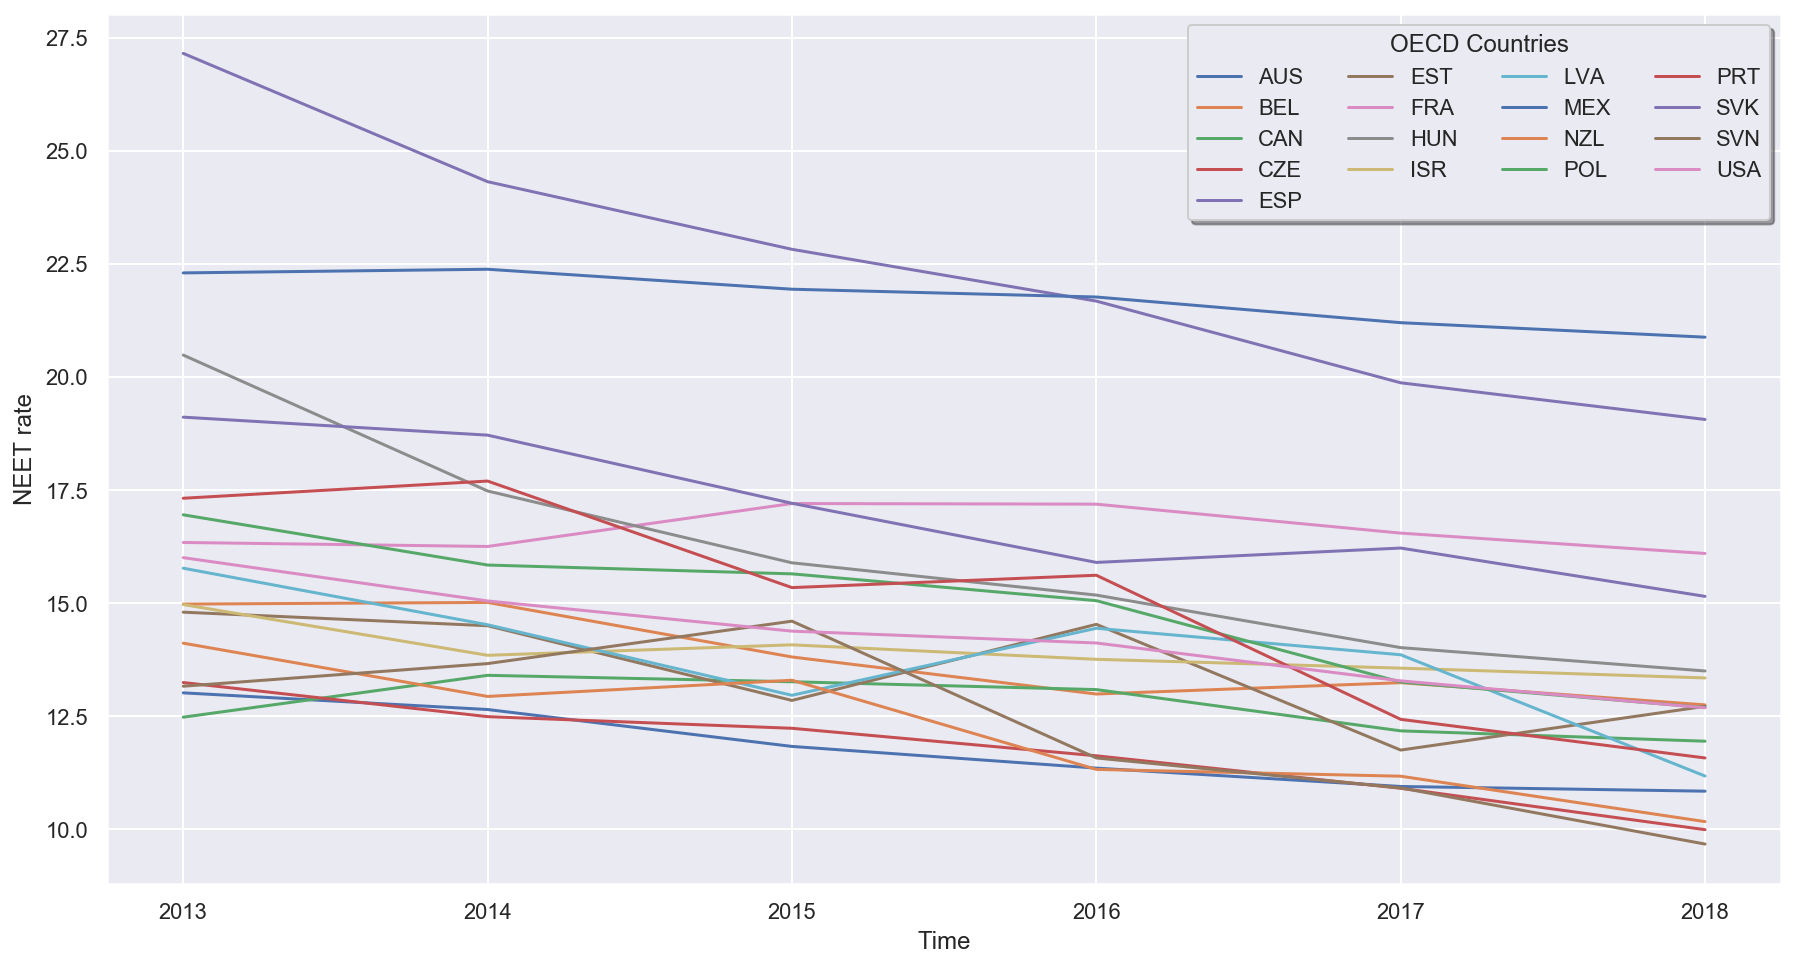

In [9]:
plt.figure(figsize=(15,8))
for code in np.unique(panel_data_l1.Country):
    country_df = panel_data_l1[panel_data_l1.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.NEET, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('NEET rate', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

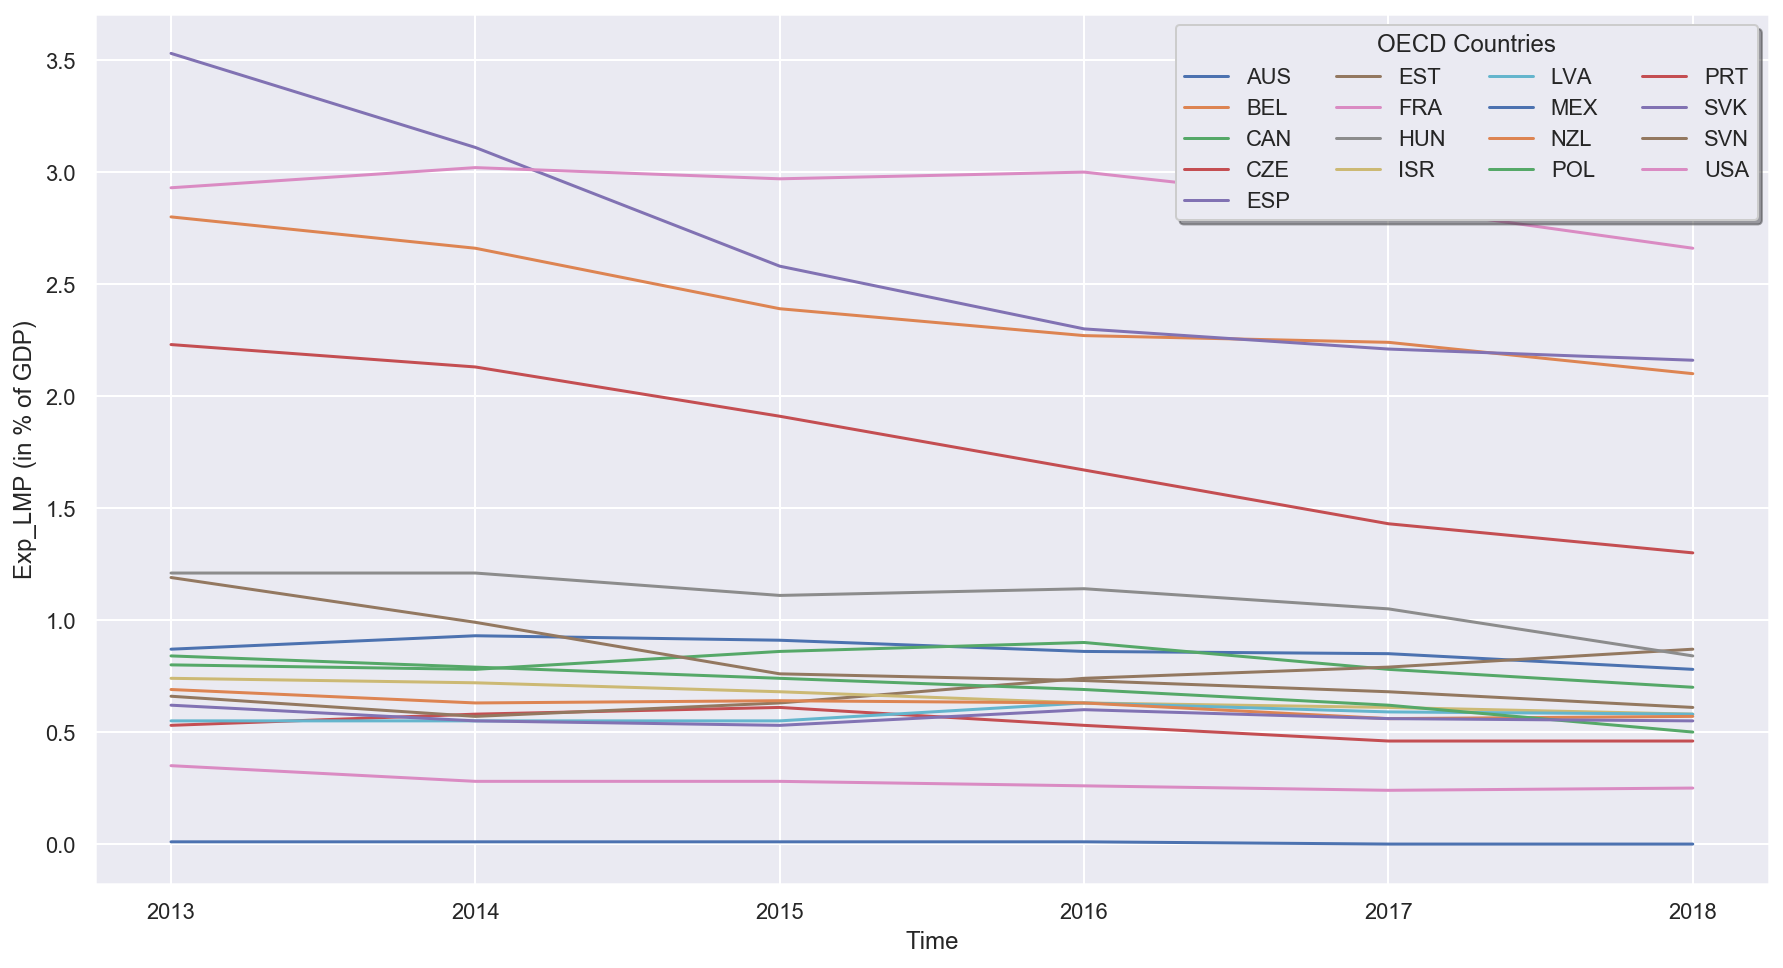

In [10]:
plt.figure(figsize=(15,8))
for code in np.unique(panel_data_l1.Country):
    country_df = panel_data_l1[panel_data_l1.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.Exp_LMP, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('Exp_LMP (in % of GDP)', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

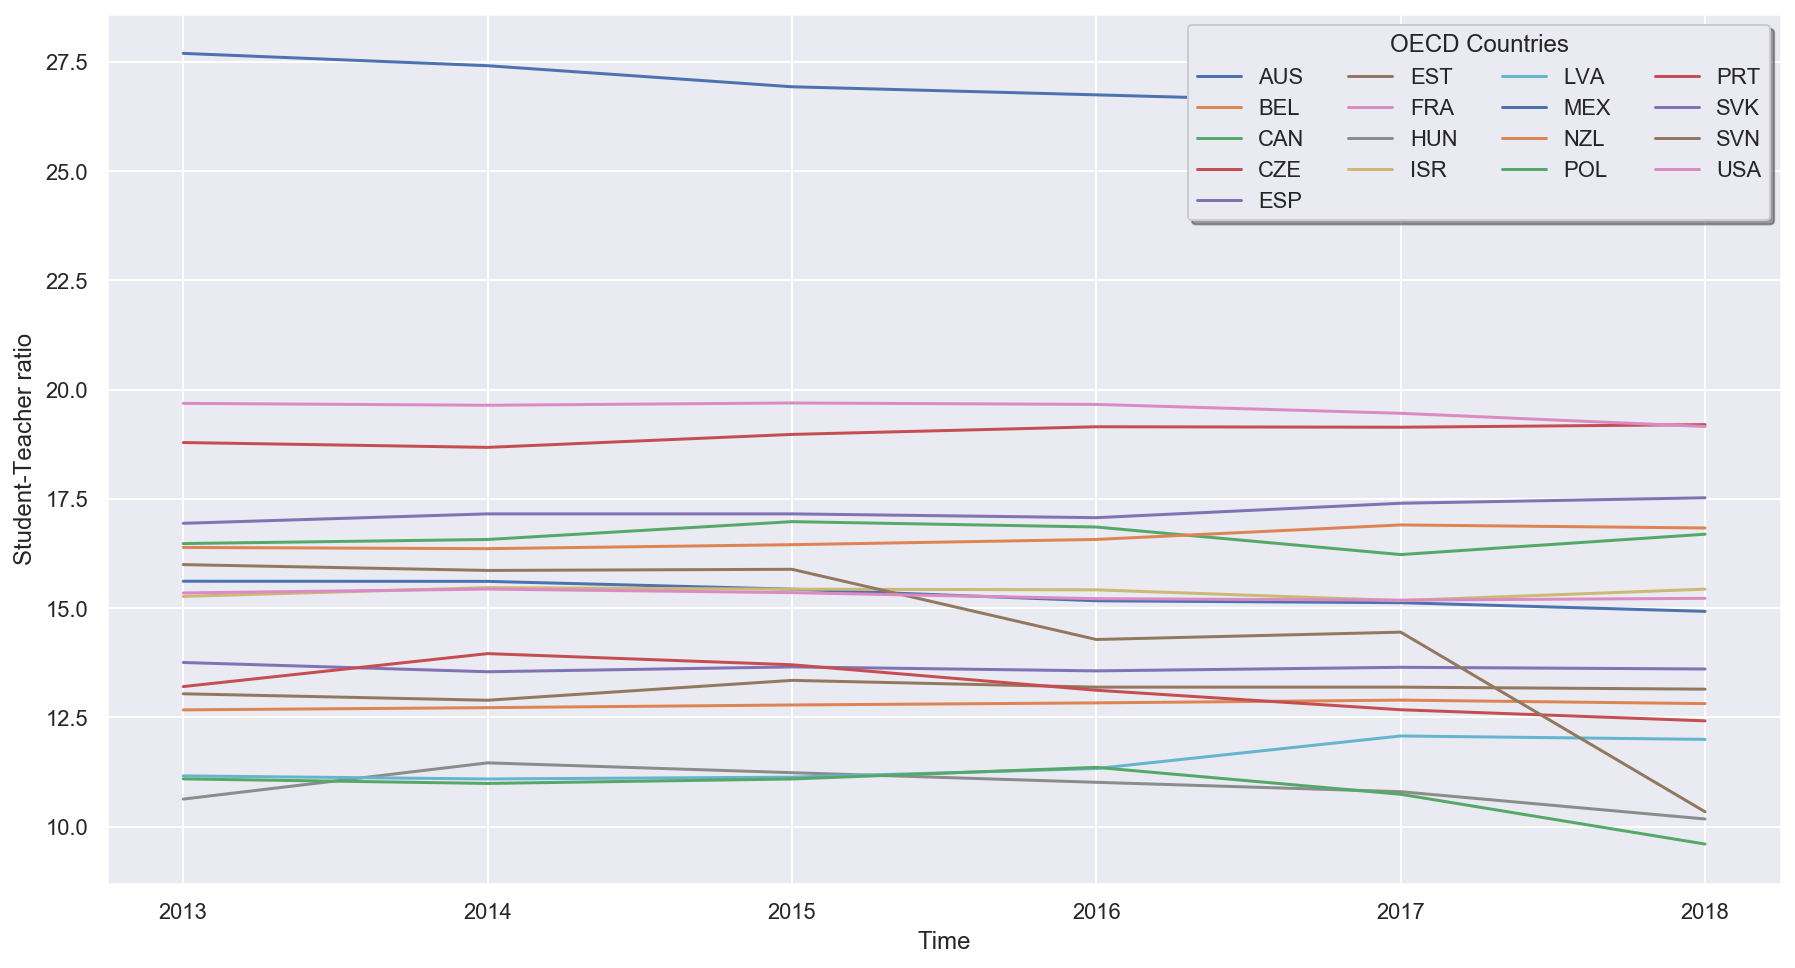

In [11]:
plt.figure(figsize=(15,8))
for code in np.unique(panel_data_l1.Country):
    country_df = panel_data_l1[panel_data_l1.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.STR, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('Student-Teacher ratio', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

# Create panel data for economic features

In [12]:
df_eco_features

,Country,Time,GDP,CPI,DEBT
0,AUS,2000,21679.247842,4.457435,41.14750
1,AUS,2001,19490.861110,4.407135,40.40488
2,AUS,2002,20082.483267,2.981575,38.67284
3,AUS,2003,23447.031001,2.732596,35.66726
4,AUS,2004,30430.676437,2.343255,32.31054
...,...,...,...,...,...
652,USA,2015,56839.381774,0.118627,136.43000
653,USA,2016,57951.584082,1.261583,138.11100
654,USA,2017,60062.222313,2.130110,134.67420
655,USA,2018,62996.471285,2.442583,136.17960


In [13]:
gdp = df_eco_features.GDP
lgdp = np.log(gdp)

In [14]:
panel_data_l1.NEET.describe(), panel_data_l1.Exp_LMP.describe(), panel_data_l1.STR.describe()

(count    128.000000
 mean      14.063179
 std        3.809247
 min        6.061046
 25%       11.612455
 50%       13.530650
 75%       15.892672
 max       27.151373
 Name: NEET, dtype: float64,
 count    128.000000
 mean       1.088203
 std        0.821178
 min        0.000000
 25%        0.557500
 50%        0.750000
 75%        1.397500
 max        3.530000
 Name: Exp_LMP, dtype: float64,
 count    128.000000
 mean      15.202148
 std        3.901298
 min        8.819000
 25%       12.711000
 50%       15.266500
 75%       16.838500
 max       27.691000
 Name: STR, dtype: float64)

In [15]:
df_eco_features['LogGDP'] = lgdp

## Add economic features to explanatory variables

In [16]:
added_features = df_eco_features[df_eco_features.Time.isin(years)].reset_index(drop=True)
df_eco_neet = pd.DataFrame(columns=['Country', 'Time', 'NEET', 'Exp_LMP', 'STR', 'Exp_LMP_2', 'STR_2', 'STR_3', 'GDP', 'CPI', 'DEBT'])

In [17]:
for obs in panel_data_l1.itertuples():
    country, time = obs[1], obs[2]
    new_el = added_features.loc[(added_features.Country==country)&(added_features.Time==time)]
    if len(new_el.index) > 0:
        line = {'Country':country, 'Time':time, 'NEET':obs[3], 'Exp_LMP':obs[4], 'STR':obs[5], 'Exp_LMP_2':obs[7], 'STR_2':obs[9], 'STR_3':obs[10], 'GDP':new_el.GDP.values[0], 'CPI':new_el.CPI.values[0], 'DEBT':new_el.DEBT.values[0]}
        df_eco_neet = df_eco_neet.append(line, ignore_index=True)

# Add education features to explanatory variables + eco features

In [18]:
reduced_obs = df_eco_neet[df_eco_neet.Time.isin(years[:-1])].reset_index(drop=True)
df_eco_educ_neet = pd.DataFrame(columns=['Country', 'Time', 'NEET', 'Exp_LMP', 'STR', 'Exp_LMP_2', 'STR_2', 'STR_3', 'GDP', 'CPI', 'DEBT', 'Years_schooling', 'Avg_class_size', 'Exp_educ'])

In [19]:
for obs in reduced_obs.itertuples():
    country, time = obs[1], obs[2]
    new_el = df_educ_features_l1.loc[(df_educ_features_l1.Country==country)&(df_educ_features_l1.Time==time)]
    if len(new_el.index) > 0:
        line = {'Country':country, 'Time':time, 'NEET':obs[3], 'Exp_LMP':obs[4], 'STR':obs[5], 'Exp_LMP_2':obs[6], 'STR_2':obs[7], 'STR_3':obs[8], 'GDP':obs[9], 'CPI':obs[10], 'DEBT':obs[11], 'Years_schooling':new_el.Years_schooling.values[0], 'Avg_class_size':new_el.Avg_class_size.values[0], 'Exp_educ':new_el.Exp_educ.values[0]}
        df_eco_educ_neet = df_eco_educ_neet.append(line, ignore_index=True)

In [20]:
df_eco_neet

,Country,Time,NEET,Exp_LMP,STR,Exp_LMP_2,STR_2,STR_3,GDP,CPI,DEBT
0,AUS,2013,13.015899,0.87,15.615,0.7569,243.828225,3807.377733,68150.107041,2.449889,55.70968
1,AUS,2014,12.647472,0.93,15.612,0.8649,243.734544,3805.183701,62510.791171,2.487923,61.36842
2,AUS,2015,11.831610,0.91,15.433,0.8281,238.177489,3675.793188,56755.721712,1.508367,64.18005
3,AUS,2016,11.352150,0.86,15.168,0.7396,230.068224,3489.674822,49971.131456,1.276991,68.39156
4,AUS,2017,10.946128,0.85,15.124,0.7225,228.735376,3459.393827,54027.966818,1.948647,65.60463
...,...,...,...,...,...,...,...,...,...,...,...
117,USA,2014,15.047262,0.28,15.435,0.0784,238.239225,3677.222438,55064.744548,1.622223,135.58440
118,USA,2015,14.380193,0.28,15.354,0.0784,235.745316,3619.633582,56839.381774,0.118627,136.43000
119,USA,2016,14.118049,0.26,15.216,0.0676,231.526656,3522.909598,57951.584082,1.261583,138.11100
120,USA,2017,13.280724,0.24,15.182,0.0576,230.493124,3499.346609,60062.222313,2.130110,134.67420


In [21]:
calc_vif(df_eco_neet[['Exp_LMP', 'STR', 'GDP', 'CPI', 'DEBT']])

,variables,VIF
0,Exp_LMP,3.516405
1,STR,7.180813
2,GDP,3.033882
3,CPI,2.543530
4,DEBT,5.516443


In [22]:
df_eco_educ_neet

,Country,Time,NEET,Exp_LMP,STR,Exp_LMP_2,STR_2,STR_3,GDP,CPI,DEBT,Years_schooling,Avg_class_size,Exp_educ
0,AUS,2013,13.015899,0.87,15.615,0.7569,243.828225,3807.377733,68150.107041,2.449889,55.70968,12.6,23.725,9241.9922
1,AUS,2014,12.647472,0.93,15.612,0.8649,243.734544,3805.183701,62510.791171,2.487923,61.36842,12.7,23.859,9257.9980
2,AUS,2015,11.831610,0.91,15.433,0.8281,238.177489,3675.793188,56755.721712,1.508367,64.18005,12.8,23.821,9524.7178
3,AUS,2016,11.352150,0.86,15.168,0.7396,230.068224,3489.674822,49971.131456,1.276991,68.39156,12.9,23.669,10022.5670
4,AUS,2017,10.946128,0.85,15.124,0.7225,228.735376,3459.393827,54027.966818,1.948647,65.60463,12.9,23.613,10238.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,ESP,2013,27.151373,3.53,13.756,12.4609,189.227536,2603.013985,29059.547952,1.408546,106.55730,9.5,21.606,6967.5908
75,ESP,2014,24.314959,3.11,13.544,9.6721,183.439936,2484.510493,29461.550334,-0.150870,119.47340,9.7,21.713,7052.4565
76,ESP,2015,22.820313,2.58,13.655,6.6564,186.459025,2546.097986,25732.018365,-0.500461,117.07530,9.7,21.878,7356.7319
77,ESP,2016,21.675491,2.30,13.564,5.2900,183.982096,2495.533150,26505.343216,-0.202672,117.33050,9.8,21.875,7805.0806


[Text(0, 0.5, 'Exp_LMP'),
 Text(0, 1.5, 'STR'),
 Text(0, 2.5, 'GDP'),
 Text(0, 3.5, 'CPI'),
 Text(0, 4.5, 'DEBT'),
 Text(0, 5.5, 'Years_school'),
 Text(0, 6.5, 'Class_size'),
 Text(0, 7.5, 'Exp_educ')]

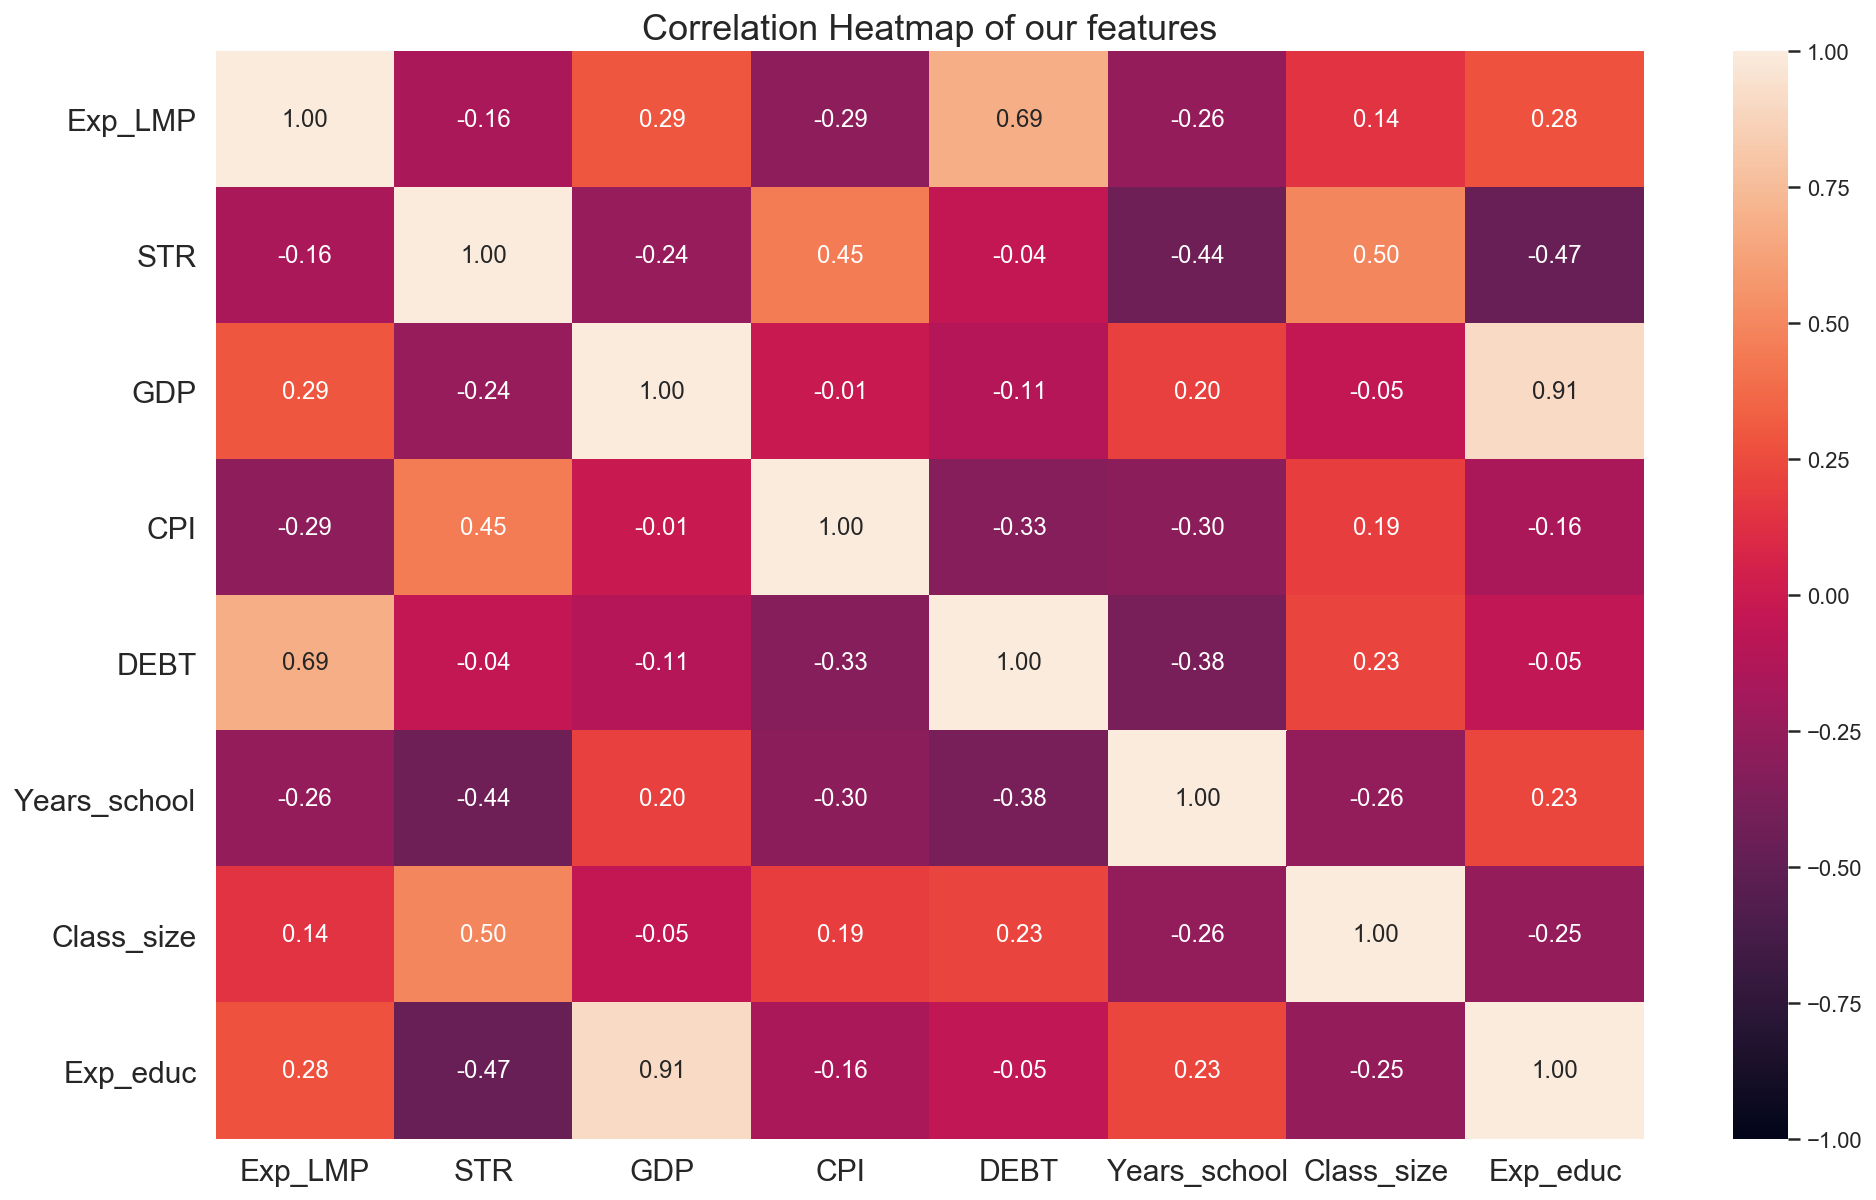

In [40]:
plt.figure(figsize=(16, 10))
heatmap_full = seaborn.heatmap(df_eco_educ_neet.drop(['Country', 'Time', 'NEET', 'Exp_LMP_2', 'STR_2', 'STR_3'], axis=1).corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap_full.set_title('Correlation Heatmap of our features', size=18)
labels = ['Exp_LMP', 'STR', 'GDP', 'CPI', 'DEBT', 'Years_school', 'Class_size', 'Exp_educ']
heatmap_full.set_xticklabels(labels, fontsize = 15)
heatmap_full.set_yticklabels(labels, fontsize = 15)

In [24]:
calc_vif(df_eco_educ_neet[['Exp_LMP', 'STR', 'GDP', 'CPI', 'DEBT', 'Years_schooling', 'Avg_class_size', 'Exp_educ']])

,variables,VIF
0,Exp_LMP,7.257291
1,STR,22.181101
2,GDP,18.687627
3,CPI,2.402457
4,DEBT,14.606757
5,Years_schooling,37.737918
6,Avg_class_size,52.078518
7,Exp_educ,42.922510
